<a href="https://colab.research.google.com/github/Vineet2107/ML-for-Civil-Engineering-CE784A-/blob/main/Driver_Gaze_Zone_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#imported necessary packages and libraries
import matplotlib.pyplot as plt
from skimage import io, color
import os
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
#path of train and test data
train_path = '/content/drive/MyDrive/gaze_dataset/train'
test_path = '/content/drive/MyDrive/gaze_dataset/test'

In [4]:
#path of raveling, non revaling and test data
Centerstack_data = '/content/drive/MyDrive/gaze_dataset/train/Centerstack'
Forward_data = '/content/drive/MyDrive/gaze_dataset/train/Forward'
Left_wm_data = '/content/drive/MyDrive/gaze_dataset/train/Left_wing_mirror'
Rearview_data = '/content/drive/MyDrive/gaze_dataset/train/Rearview_mirror'
Right_wm_data = '/content/drive/MyDrive/gaze_dataset/train/Right_wing_mirror'
test_data = '/content/drive/MyDrive/gaze_dataset/test'

In [9]:
list_cs = os.listdir(Centerstack_data)
list_f = os.listdir(Forward_data)
list_lwm = os.listdir(Left_wm_data)
list_rv = os.listdir(Rearview_data)
list_rwm = os.listdir(Right_wm_data)
list_test = os.listdir(test_data)

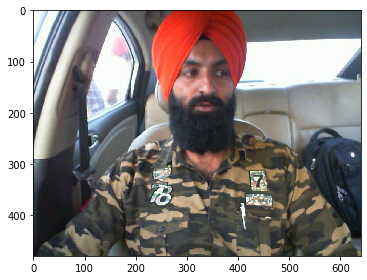

In [10]:
# stored non raveling image array in img_nr
img_cs = []
for i in range(len(list_cs)):
  img = io.imread(os.path.join(Centerstack_data,
                               list_cs[i]))
  img_cs.append(np.array(img))
  io.imshow(img)

img_f = []
for i in range(len(list_f)):
  img = io.imread(os.path.join(Forward_data,
                               list_f[i]))
  img_f.append(np.array(img))
  io.imshow(img)

img_lwm = []
for i in range(len(list_lwm)):
  img = io.imread(os.path.join(Left_wm_data,
                               list_lwm[i]))
  img_lwm.append(np.array(img))
  io.imshow(img)

img_rv = []
for i in range(len(list_rv)):
  img = io.imread(os.path.join(Rearview_data,
                               list_rv[i]))
  img_rv.append(np.array(img))
  io.imshow(img)

#stored raveling image array in img_r 
img_rwm = []
for i in range(len(list_rwm)):
  img = io.imread(os.path.join(Right_wm_data,
                               list_rwm[i]))
  img_rwm.append(np.array(img))
  io.imshow(img)

#stored test image array in img_test
img_test = []
for i in range(len(list_test)):
  img = io.imread(os.path.join(test_data,
                               list_test[i]))
  img_test.append(np.array(img))
  io.imshow(img)

In [15]:
y_cs=np.empty(500)
y_cs.fill(0)

y_f=np.empty(500)
y_f.fill(1)

y_lwm=np.empty(500)
y_lwm.fill(2)

y_rv=np.empty(500)
y_rv.fill(3)

y_rwm=np.empty(500)
y_rwm.fill(4)

y = np.concatenate((y_cs, y_f, y_lwm, y_rv, y_rwm), axis = 0)

In [16]:
perms = np.random.permutation(2500)

In [ ]:
X = np.concatenate((img_cs, img_f, img_lwm, img_rv, img_rwm), axis = 0)

In [ ]:
X = X[perms]
y = y[perms]